# CS231n Lecture 2&3

## Lecture 2

### KNN K-NearestNeighbor

사진을 보고 고정된 카테고리 범주 하나를 마구마구

머신에게는 우리같은 처리가 힘들어(시각)
컴터에게는 큰 숫자 배열일뿐임..

관점, 조명, 변형(자세), 폐쇄(가림), 고양이 다움 같은 문제도 있음(색상, 나이)->어려움

가장 간단한거 -> K-neighbor
CIFAR10 10클래스, 50000, 10000
32x32

데이터 기반 접근법:
1. 데이터셋
2. 머신러닝 기법으로 훈련
3. 평가 (테스트 이미지를 주지 않고)
최근접이웃 분류
학습 단계: 모든 학습용 이미지와 레이블을 데이터베이스에 다 올림 -> 그리고 다 비교 -> 가장 비슷한 레이블을 답으로 분류


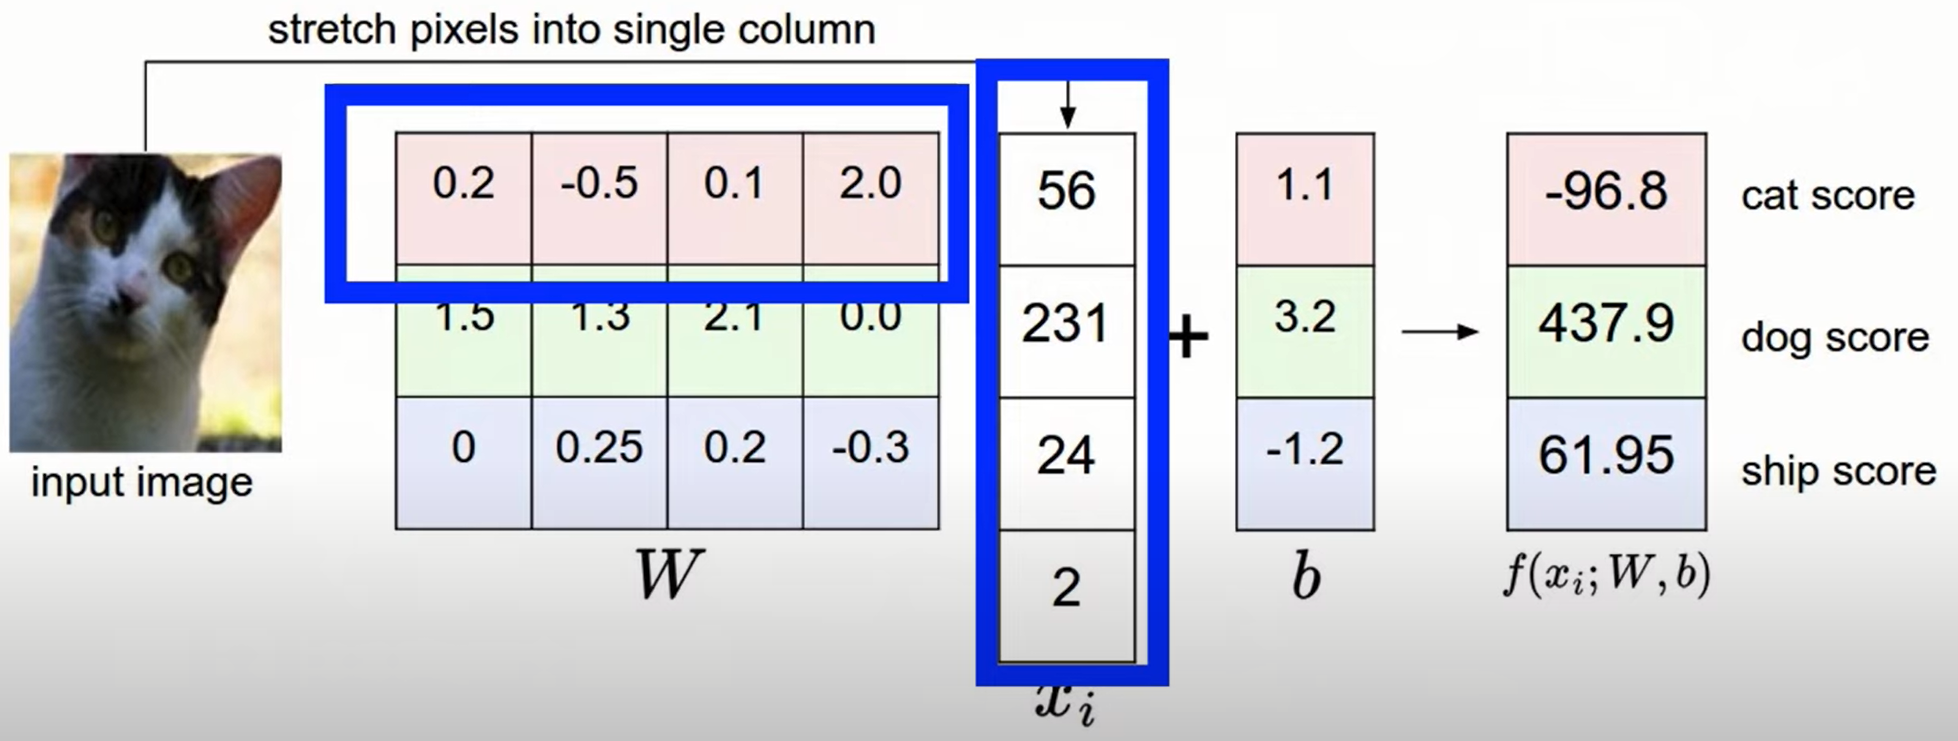


L1 디스턴스(맨해튼 거리)를 사용
test image 4x4 - training image 4x4 => pixel-wise absolute value differences

train: 메모리 상에 기억하도록
predict: for문에 있는 distances가 핵심  
5만장을 비교해서 L1 distance를 계산  
-> L1 distance가 가장 작은 것을 찾음  
이 모델은 데이터 사이즈에 따라 선형적으로 분류 작업 시간도 늘어남  
test 작업시에 답이 바로바로 나와야하는데 이 모델은 시간이 오래 걸림  
L2 Euclidiean distance도 있음 -> 하이퍼파라미터

k-Nearest Neighbor은 가까운 k개의 평균 클래스를 답으로

KNN의 문제는 k가 5라 쳤을 때 1, 2번째는 정확하게 분류하였으나 3 4 5가 다른 클래스면 3,4,5와 같은 클래스로 답을 분류하는 것이다.



L1 vs L2 and K는 몇?
How do we set the hyperparmeters?
-> Very problem-dependent
-> 시도해보고 가장 알맞는 것을 골라

테스트 세트는 마지막에 사용해야 하는 것임
-> Validation data -> Cross-validation 교차검증하기 -> K-fold 교차검증 k번

k-nearest 사용하면 안되는 이유
1. test 점수 shit
2. 거리로 판단한다는 것 자체가 에바임 오른쪽으로 좀 이동하거나 조금 가리던가 조명이 바뀌어도 똑같은 점수가 나옴

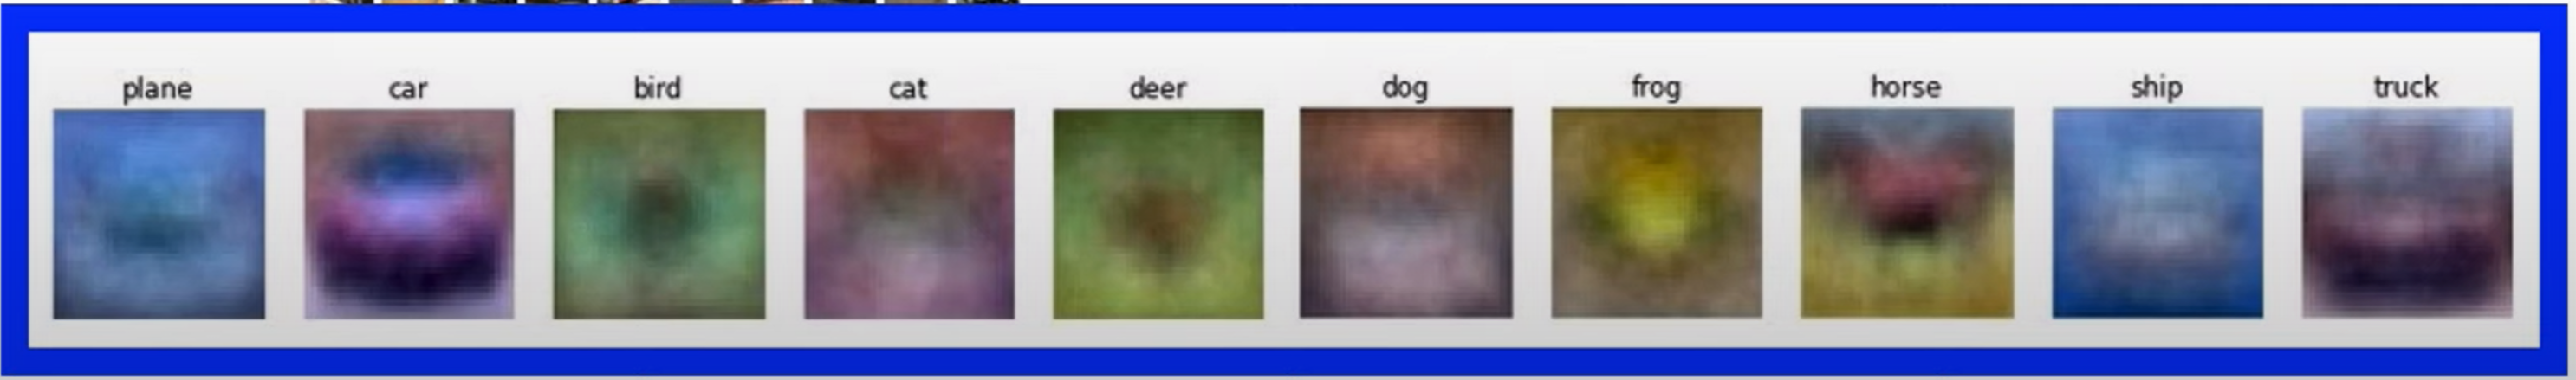

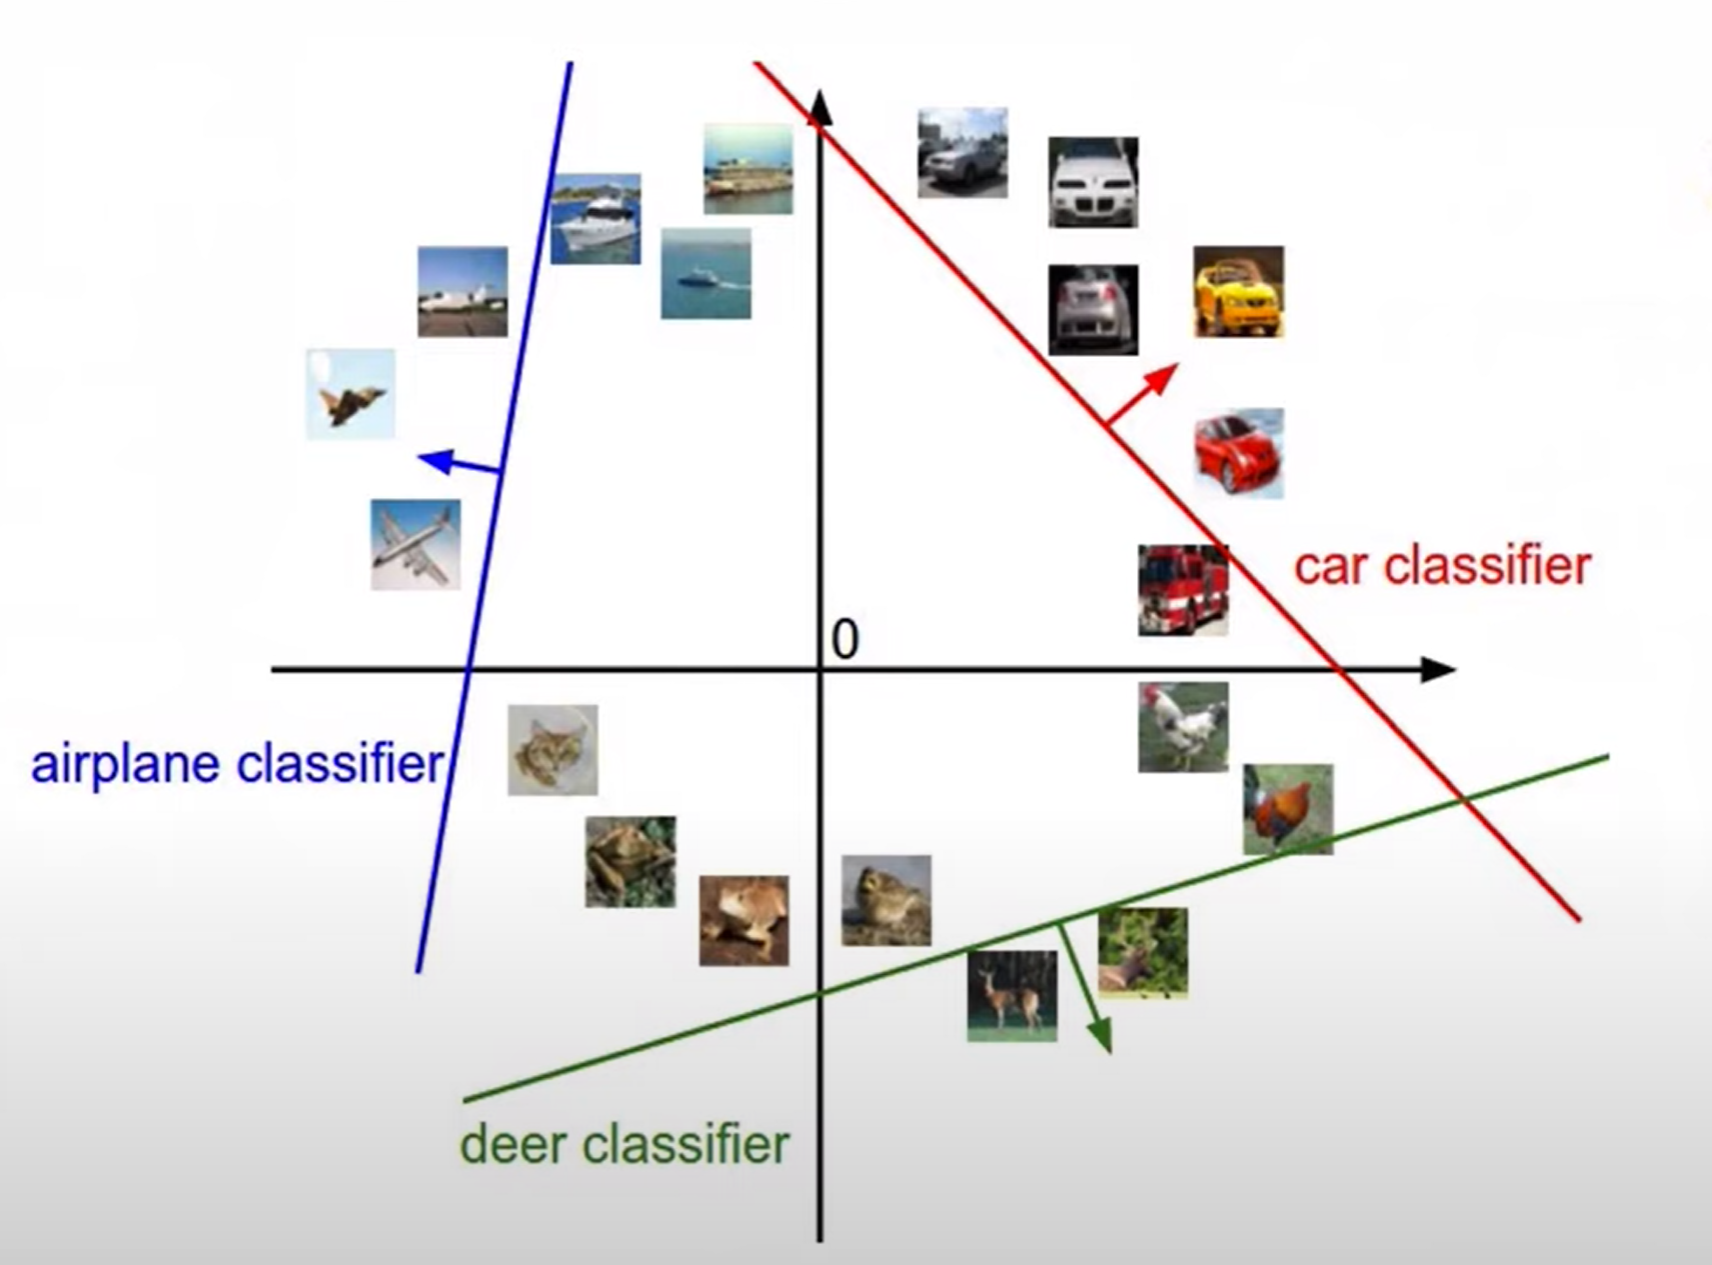

## Lecture3 Loss function and optimization

### SVM - Hinge loss

$x_i$는 image  
$y_i$는 (integer)label  
scores vector: s = f($x_i$, W)
$L_i = \sum_{j\neq y_i} max(0, s_i - s_{y_i}+1)$  


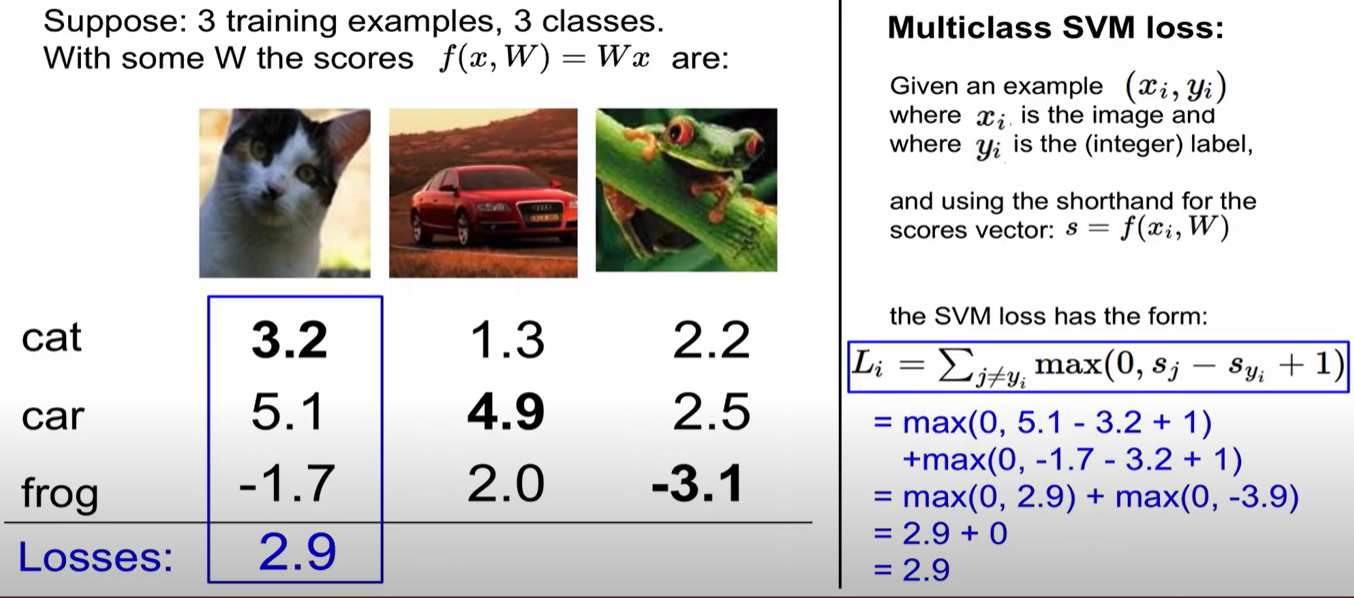

loss의 값은 위의 식처럼 $L_i$를 합해주면 됨.  
고양이의 경우 max(0, 5.1(car)-3.2(cat) +1(safety margin) + max(0, -1.7(frog) -3.2 +1)=2.9  
여기서 2.9는 우리의 분류기가 학습 예제에서 얼마나 엉터리인지 정략적으로 측정한 값  
자동차의 경우 잘 분류한 경우이기 때문에 값이 0이 나옴

멀티클래스 SVM 손실 예제 코드

In [ ]:
def L_i_vectorized(x, y, W):
  scores = W.dot(x)
  margins = np.maximum(0, scores - scores[y]+1)
  margins[y] = 0
  loss_i = np.sum(margins)
  return loss_i

Regularization  

테스트 데이터에 대한 분류기의 성능이 중요하기 때문에  훈련 데이터에 과대 적합되는 즉, 완전 구불구불한 곡선으로 훈련되는 것보다  
선형적인 모델이나 손실함수에 Regularization을 넣은 것을 사용한다.  

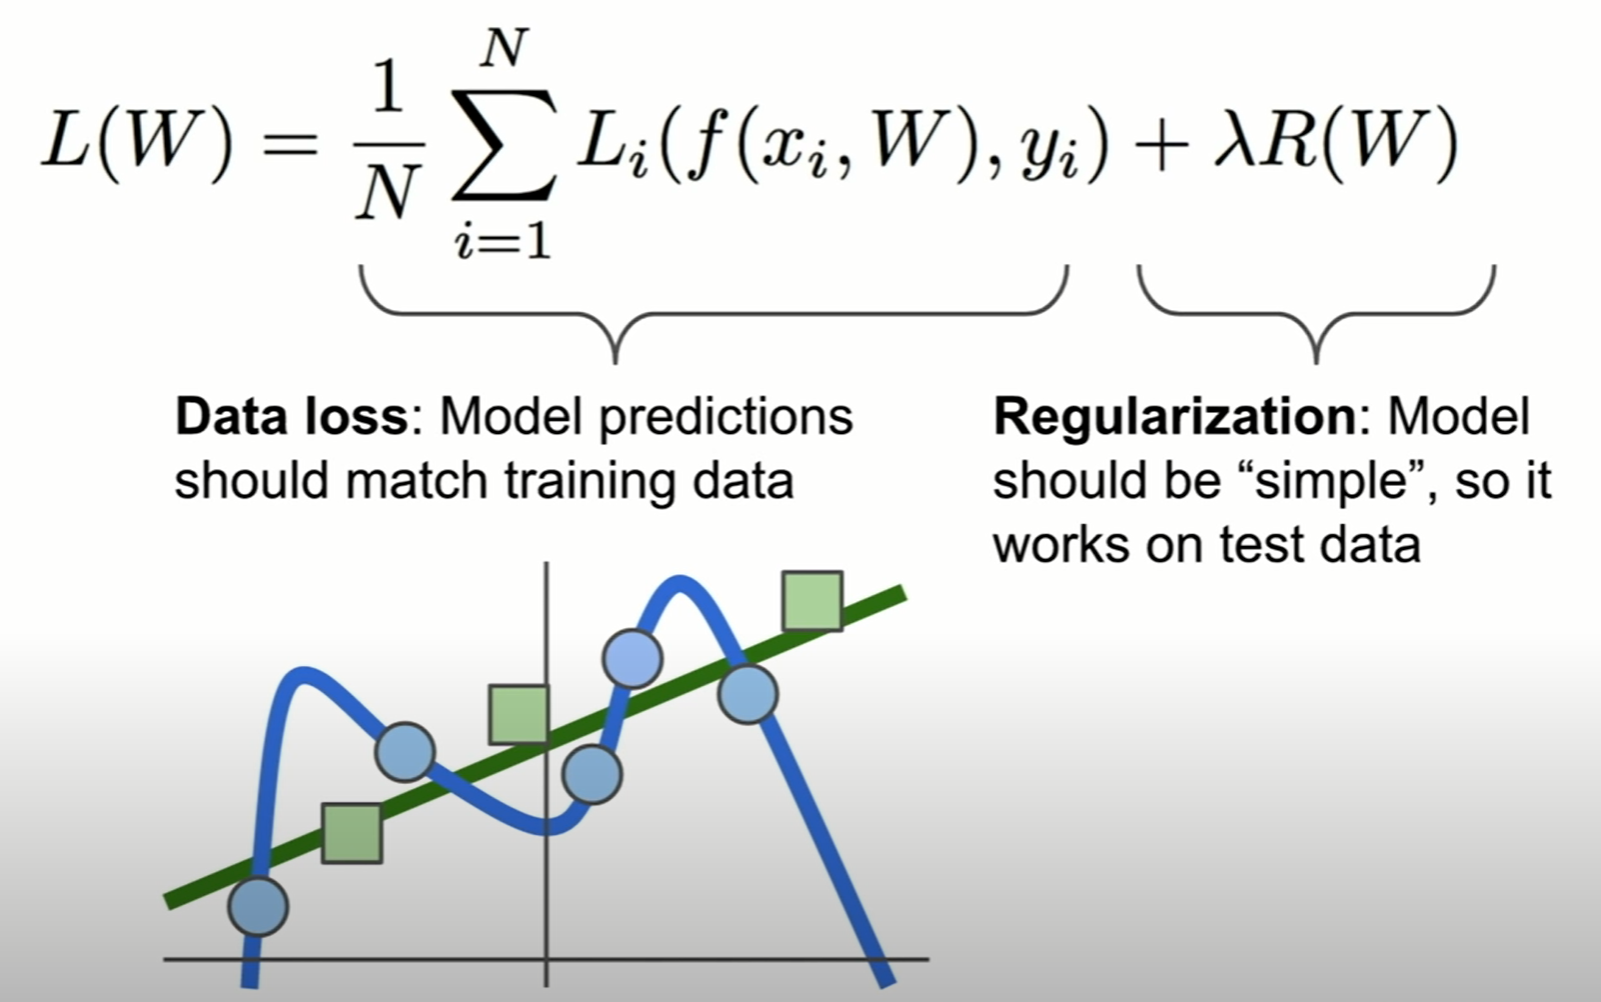

오컴의 면도날: "모든 경쟁하는 가설중에서 단순한 것이 최고다."

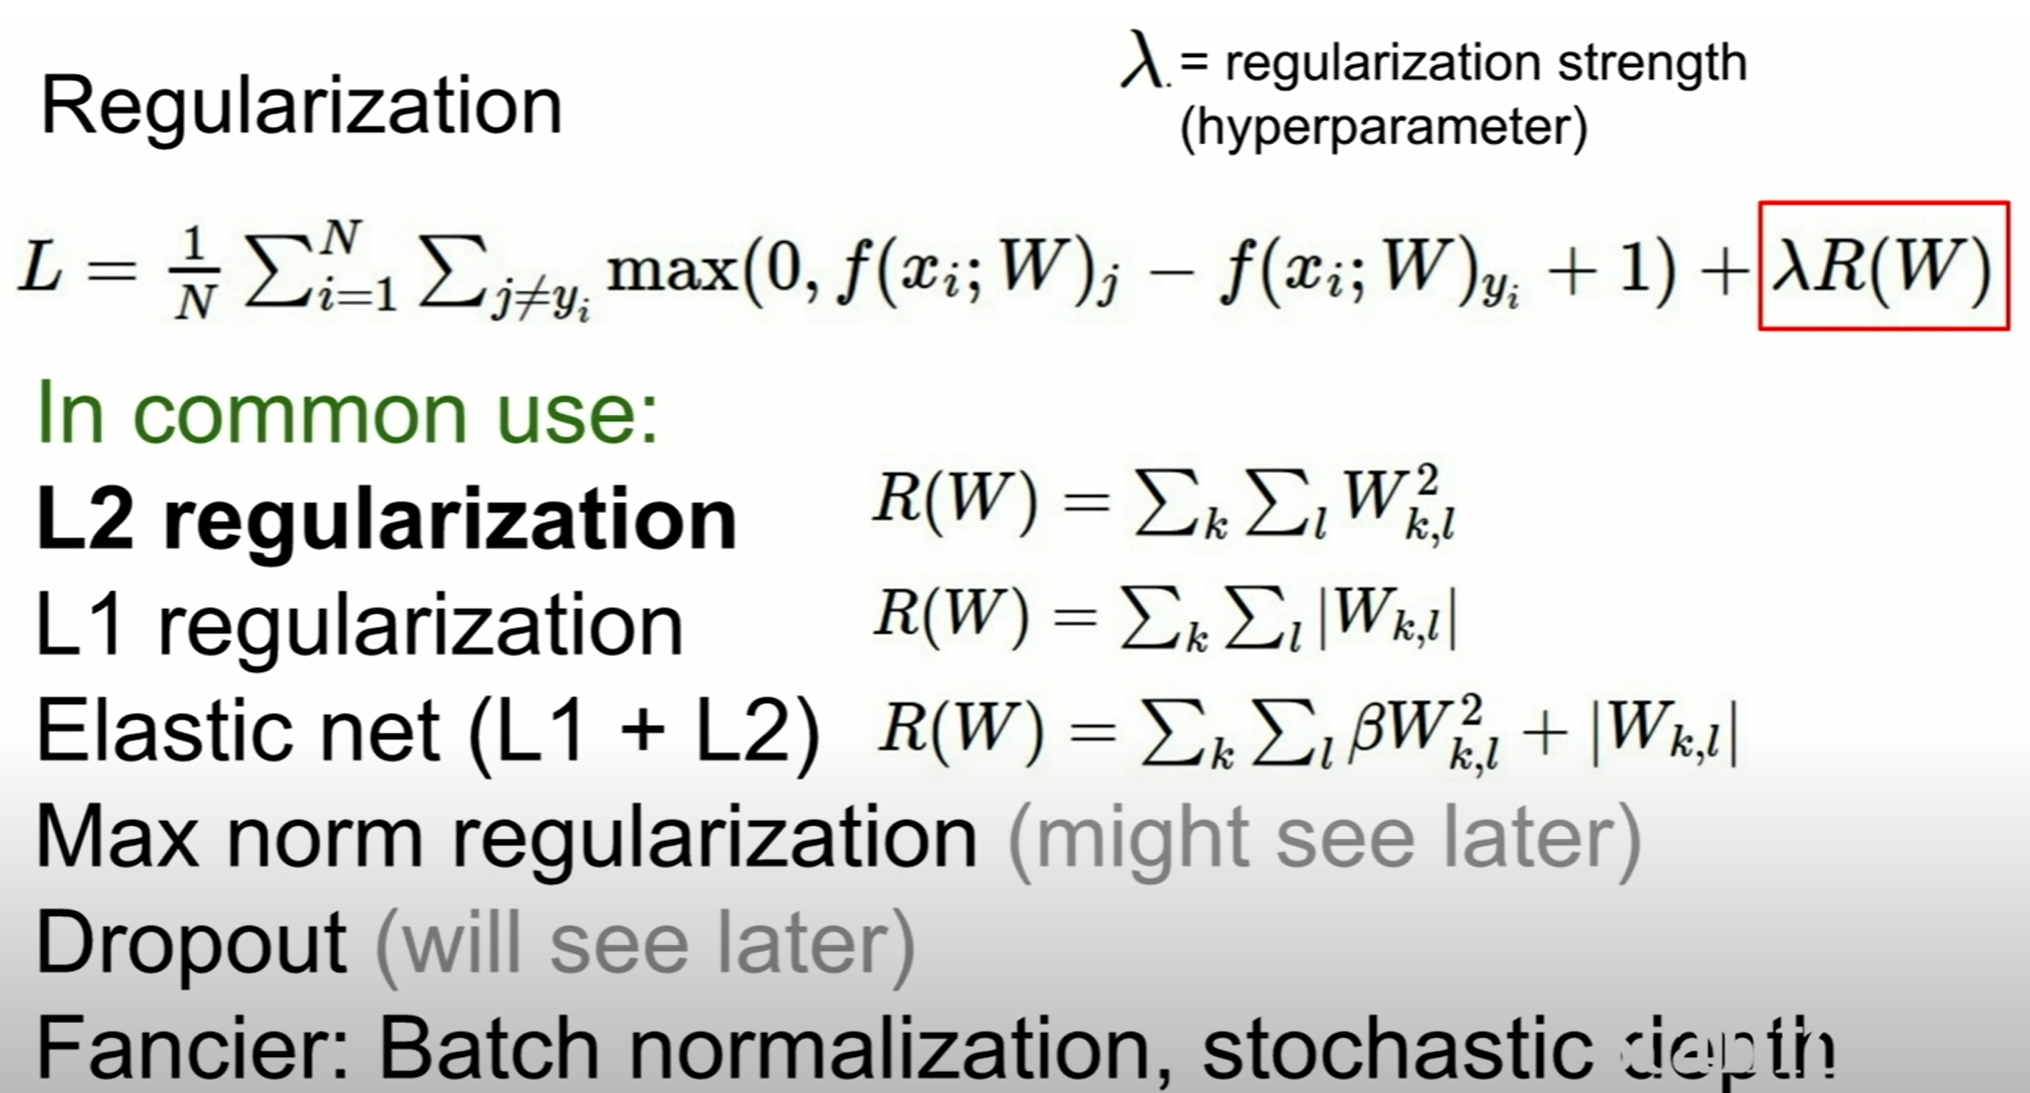

실제로 많이 사용하는 것은 L2 정규화 혹은 가중치 감쇠.  


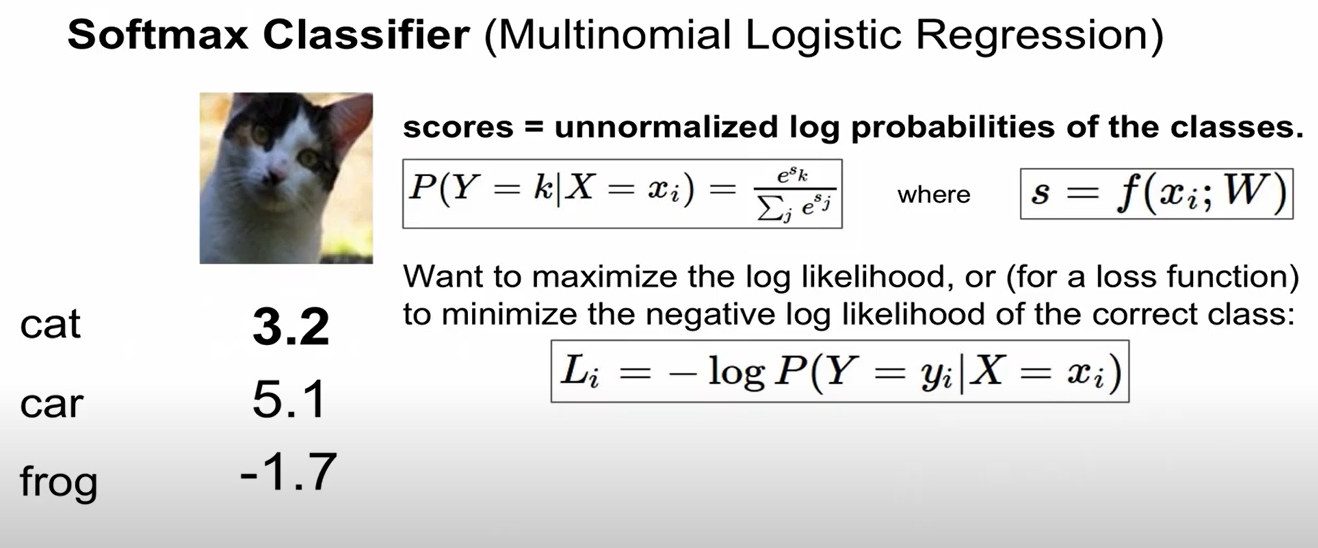

Softmax Calssifier (Multinomial Logistic Regression)  
-log가 핵심인데 log를 취하는 이유는 수학적으로 Nice하고 좀 더 편리하기 때문임.

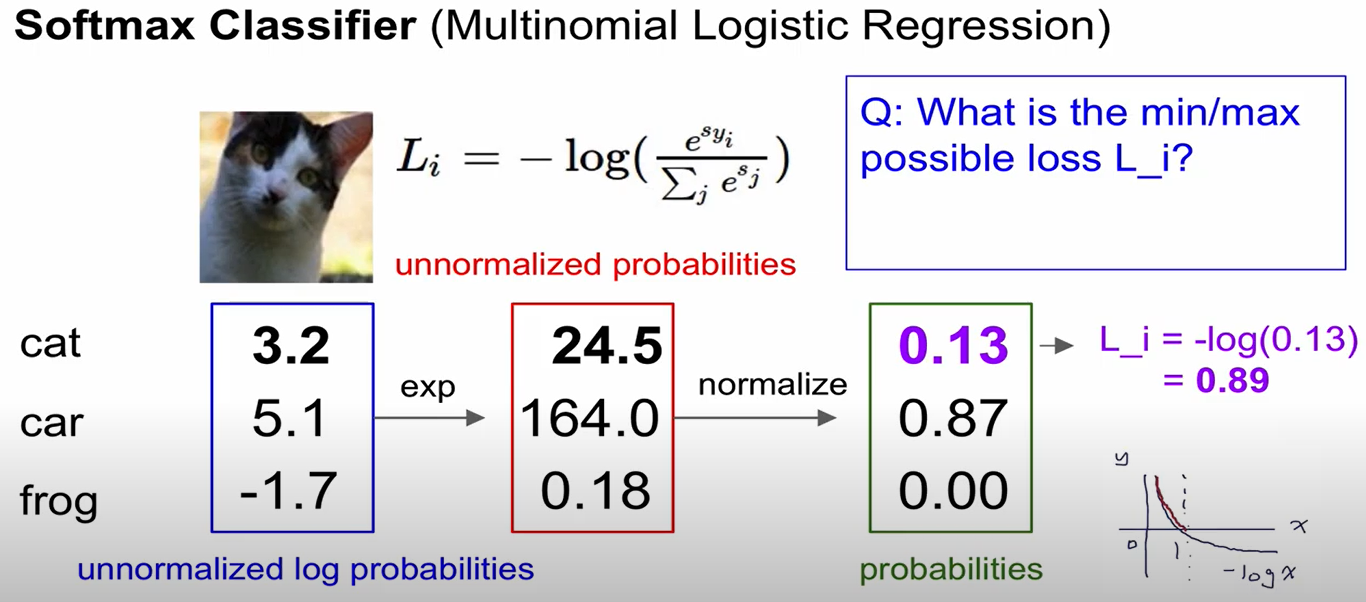

Softmax vs SVM  
SVM의 경우에는 둔감해서 변화 안할 때가 있고 Softmax는 민감한 편이다.

## Optimization

#### 랜덤 서치 절대 X

모험가 이야기 조금 나옴

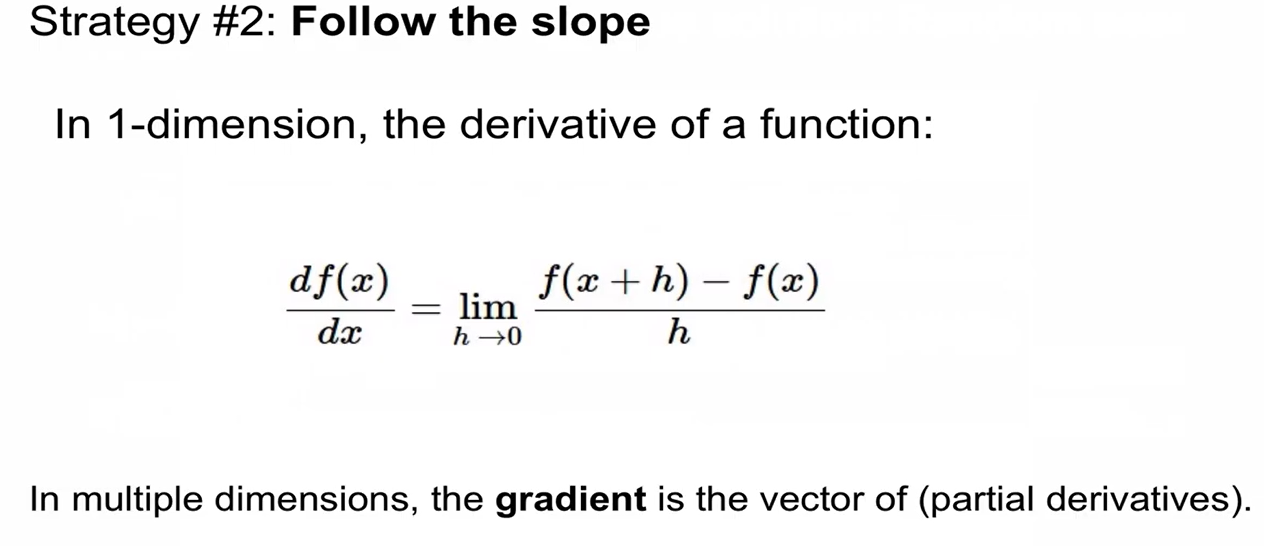

위의 것이 Numerical Gradient라 함.  
코드구현이 쉬우나 단점이 두 개가 있는데 하나는 근사치를 얻는 다는 점이고 다른 하나는 계산이 매우 느리다는 것이다.

우리가 원하는 것은 '웨이트가 변할 때 로스가 얼마나 변하냐'임  
-> Analytic grdient로 구하고 Numerical gradient로 검산

### Mini-batch Gradient Descent


Mini-batch Gradient Descent는 트레이닝셋의 일부만을 이용해서 Gradient 개선하고 파라미터 업데이트하고 다음 일부 사용하고 이런식 32, 64, 128, 256 -> mini-batch size 
mini-batch size는 컴퓨터에 맞게 하파는 아님


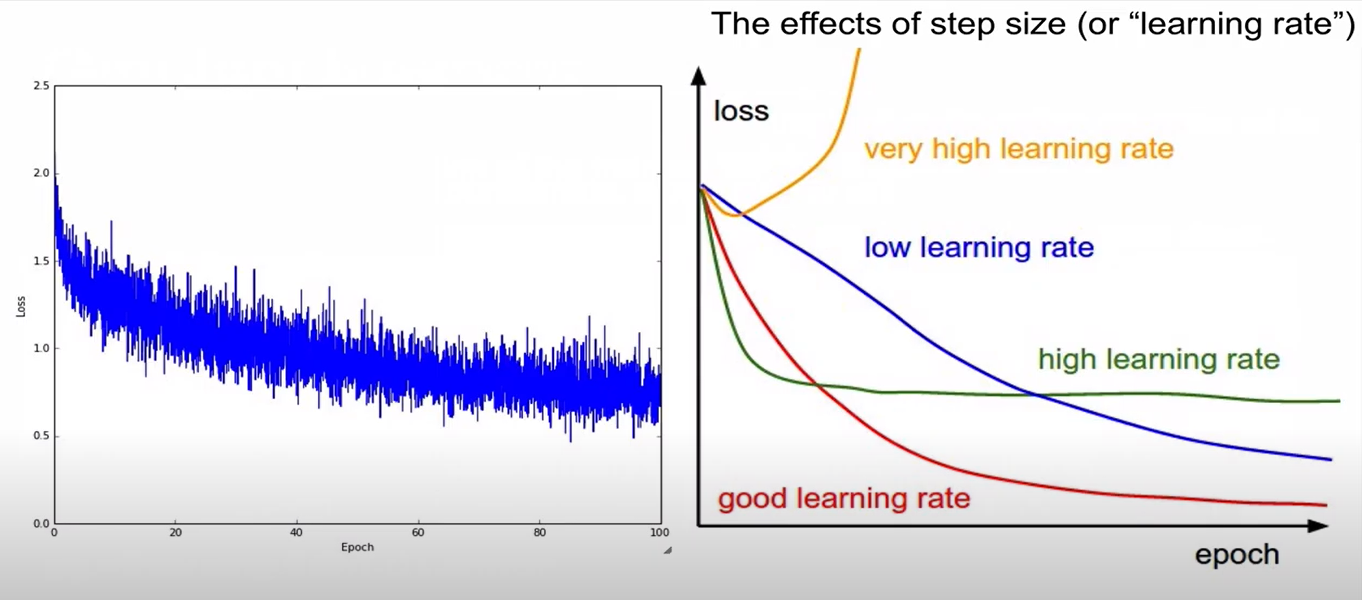

위처럼 learnin rate가 너무 크거나 작으면 안됨.  
-> decay 방법을 씀 (높게 설정했다가 점점 낮아지게)  
5강에서 추가로 배움.

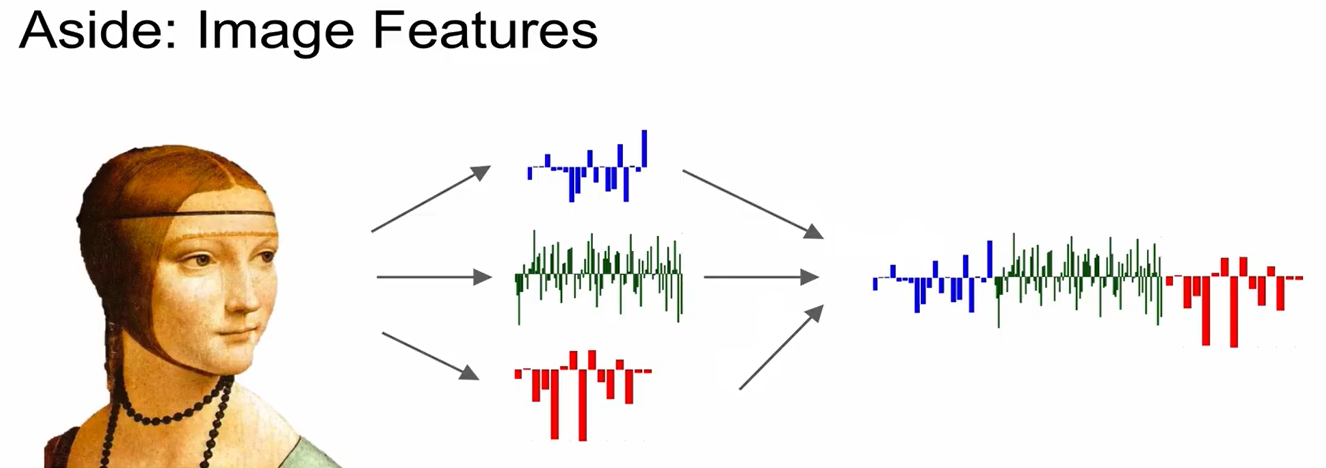

전통적인 linear 방식은 데이터를 추출하고 concatenate해주는 식  
그리고 각각 bin이 얼만지 보고 feature를 추출  
다음 방법은 edge들의 방향을 9가지 기준으로 해서 feature을 추출함.  
마지막은 Bag of words인데 그림을 보고 사전을 만든 다음 k-means를 사용하여 feature vector을 찾고 concatenate 해준 다음 입력

But 뒤에서 배우는 CNN에서는 추출할 필요가 없고 이미지 자체를 넣어주면 됨.